# Looking at The New York Times Covid-19 data

The New York Times Covid-19 data is updated as more cases emerge etc. These data files were collected on June 4th 2020, and cover data up until June 3rd 2020.

The data covers US states and counties.

## Import stuff

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

## Read in the data

In [2]:
counties = pd.read_csv('./us-counties.csv')

## What does the data look like?

fips code = Federal Information Processing Standards code.
It is used to identify states and counties. 

Note from The New York Times: "In some instances, we report data from multiple counties or other non-county geographies as a single county. For instance, we report a single value for New York City, comprising the cases for New York, Kings, Queens, Bronx and Richmond Counties. In these instances the FIPS code field will be empty."

In [3]:
counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [4]:
counties.shape

(203591, 6)

In [5]:
counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203591 entries, 0 to 203590
Data columns (total 6 columns):
date      203591 non-null object
county    203591 non-null object
state     203591 non-null object
fips      201401 non-null float64
cases     203591 non-null int64
deaths    203591 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ MB


In [6]:
counties.tail()

,date,county,state,fips,cases,deaths
203586,2020-06-03,Sweetwater,Wyoming,56037.0,31,0
203587,2020-06-03,Teton,Wyoming,56039.0,100,1
203588,2020-06-03,Uinta,Wyoming,56041.0,13,0
203589,2020-06-03,Washakie,Wyoming,56043.0,36,3
203590,2020-06-03,Weston,Wyoming,56045.0,1,0


Comment: After an initial look the data looks pretty stright forward. We have som missng fips. But that has The New York Times already commented on. 

It looks like the data shows cases for a specifik date. Not number of new cases or change. Really good to know. 

## Data output

#### How many states and protectorates are affected?

In [7]:
counties['state'].nunique()

55

All 50 states and all 5 protectorates seem to have Covid-19 cases.

In [103]:
# States/Protectorates with most and least case

### New York City

#### Development of total of number of cases in New York City

In [8]:
new_york = counties[counties['state']== 'New York']
new_york 

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
448,2020-03-02,New York City,New York,NaN,1,0
482,2020-03-03,New York City,New York,NaN,2,0
518,2020-03-04,New York City,New York,NaN,2,0
519,2020-03-04,Westchester,New York,36119.0,9,0
564,2020-03-05,Nassau,New York,36059.0,1,0
565,2020-03-05,New York City,New York,NaN,4,0
566,2020-03-05,Westchester,New York,36119.0,17,0
626,2020-03-06,Nassau,New York,36059.0,4,0
627,2020-03-06,New York City,New York,NaN,5,0


In [13]:
new_york_city = new_york[new_york['county']== 'New York City']
new_york_city 

,date,county,state,fips,cases,deaths,new cases
416,2020-03-01,New York City,New York,NaN,1,0,NaN
448,2020-03-02,New York City,New York,NaN,1,0,0.0
482,2020-03-03,New York City,New York,NaN,2,0,1.0
518,2020-03-04,New York City,New York,NaN,2,0,0.0
565,2020-03-05,New York City,New York,NaN,4,0,3.0
627,2020-03-06,New York City,New York,NaN,5,0,1.0
715,2020-03-07,New York City,New York,NaN,12,0,8.0
820,2020-03-08,New York City,New York,NaN,14,0,9.0
947,2020-03-09,New York City,New York,NaN,20,0,3.0
1098,2020-03-10,New York City,New York,NaN,37,0,18.0


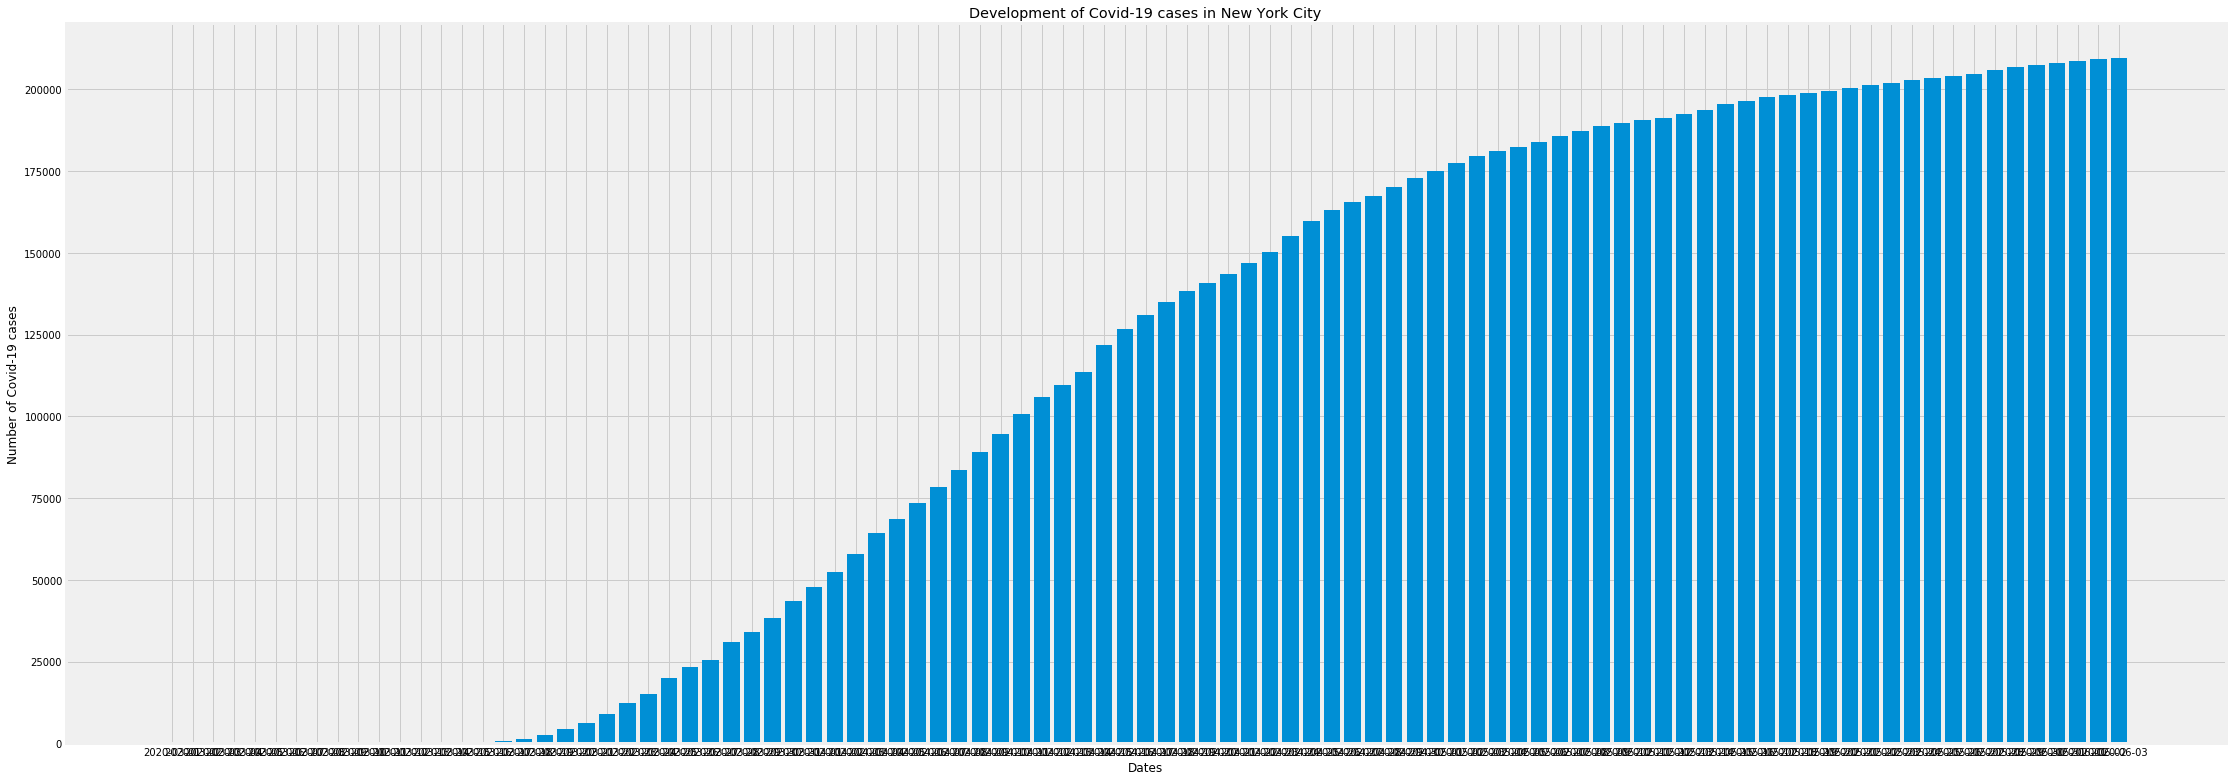

In [14]:
# Viz - Development for Covid-19 cases in New York City
fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0,0,1,1])
date = new_york_city['date']
cases = new_york_city['cases']
ax.bar(date,cases)
ax.set_ylabel('Number of Covid-19 cases')
ax.set_xlabel('Dates')
ax.set_title('Development of Covid-19 cases in New York City')
plt.show()

#### Development for new Covid-19 cases in New York City

In [19]:
new_york_city.loc[:,'new cases'] = new_york_city['cases'].diff()
new_york_city

,date,county,state,fips,cases,deaths,new cases,new deaths
416,2020-03-01,New York City,New York,NaN,1,0,NaN,NaN
448,2020-03-02,New York City,New York,NaN,1,0,0.0,0.0
482,2020-03-03,New York City,New York,NaN,2,0,1.0,0.0
518,2020-03-04,New York City,New York,NaN,2,0,0.0,0.0
565,2020-03-05,New York City,New York,NaN,4,0,2.0,0.0
627,2020-03-06,New York City,New York,NaN,5,0,1.0,0.0
715,2020-03-07,New York City,New York,NaN,12,0,7.0,0.0
820,2020-03-08,New York City,New York,NaN,14,0,2.0,0.0
947,2020-03-09,New York City,New York,NaN,20,0,6.0,0.0
1098,2020-03-10,New York City,New York,NaN,37,0,17.0,0.0


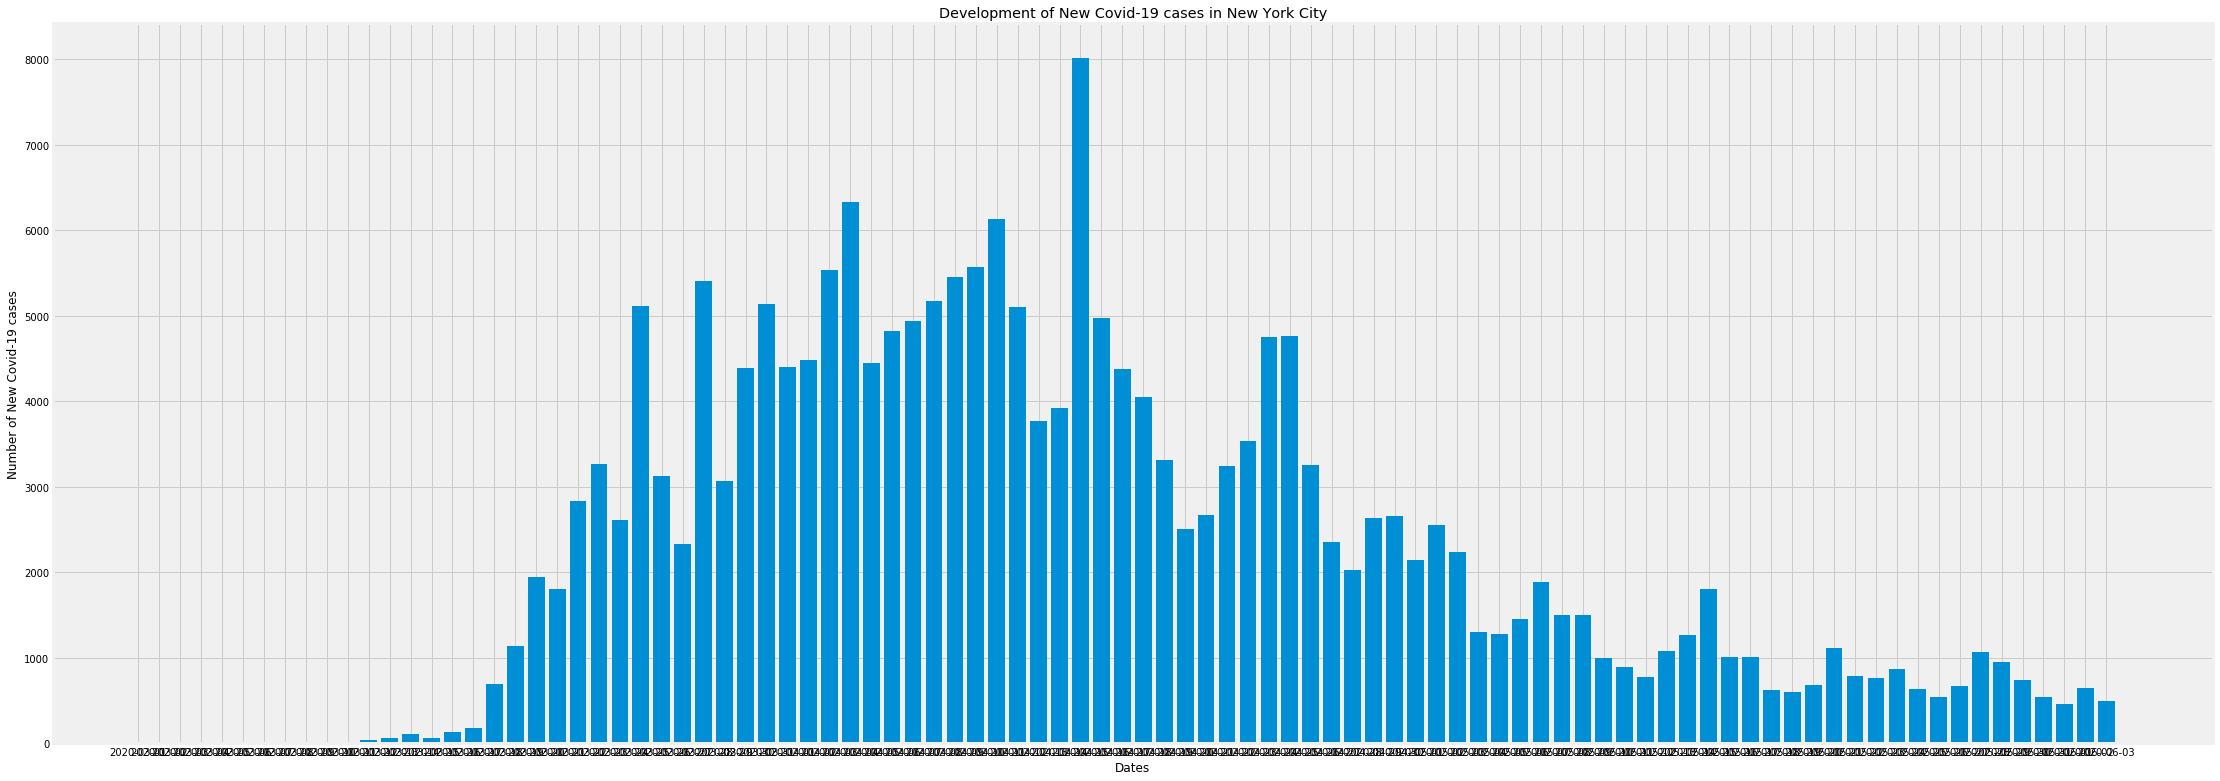

In [20]:
# Viz - Development for new Covid-19 cases in New York City
fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0,0,1,1])
date = new_york_city['date']
cases = new_york_city['new cases']
ax.bar(date,cases)
ax.set_ylabel('Number of New Covid-19 cases')
ax.set_xlabel('Dates')
ax.set_title('Development of New Covid-19 cases in New York City')
plt.show()

#### Development for Covid-19 related deaths in New York City

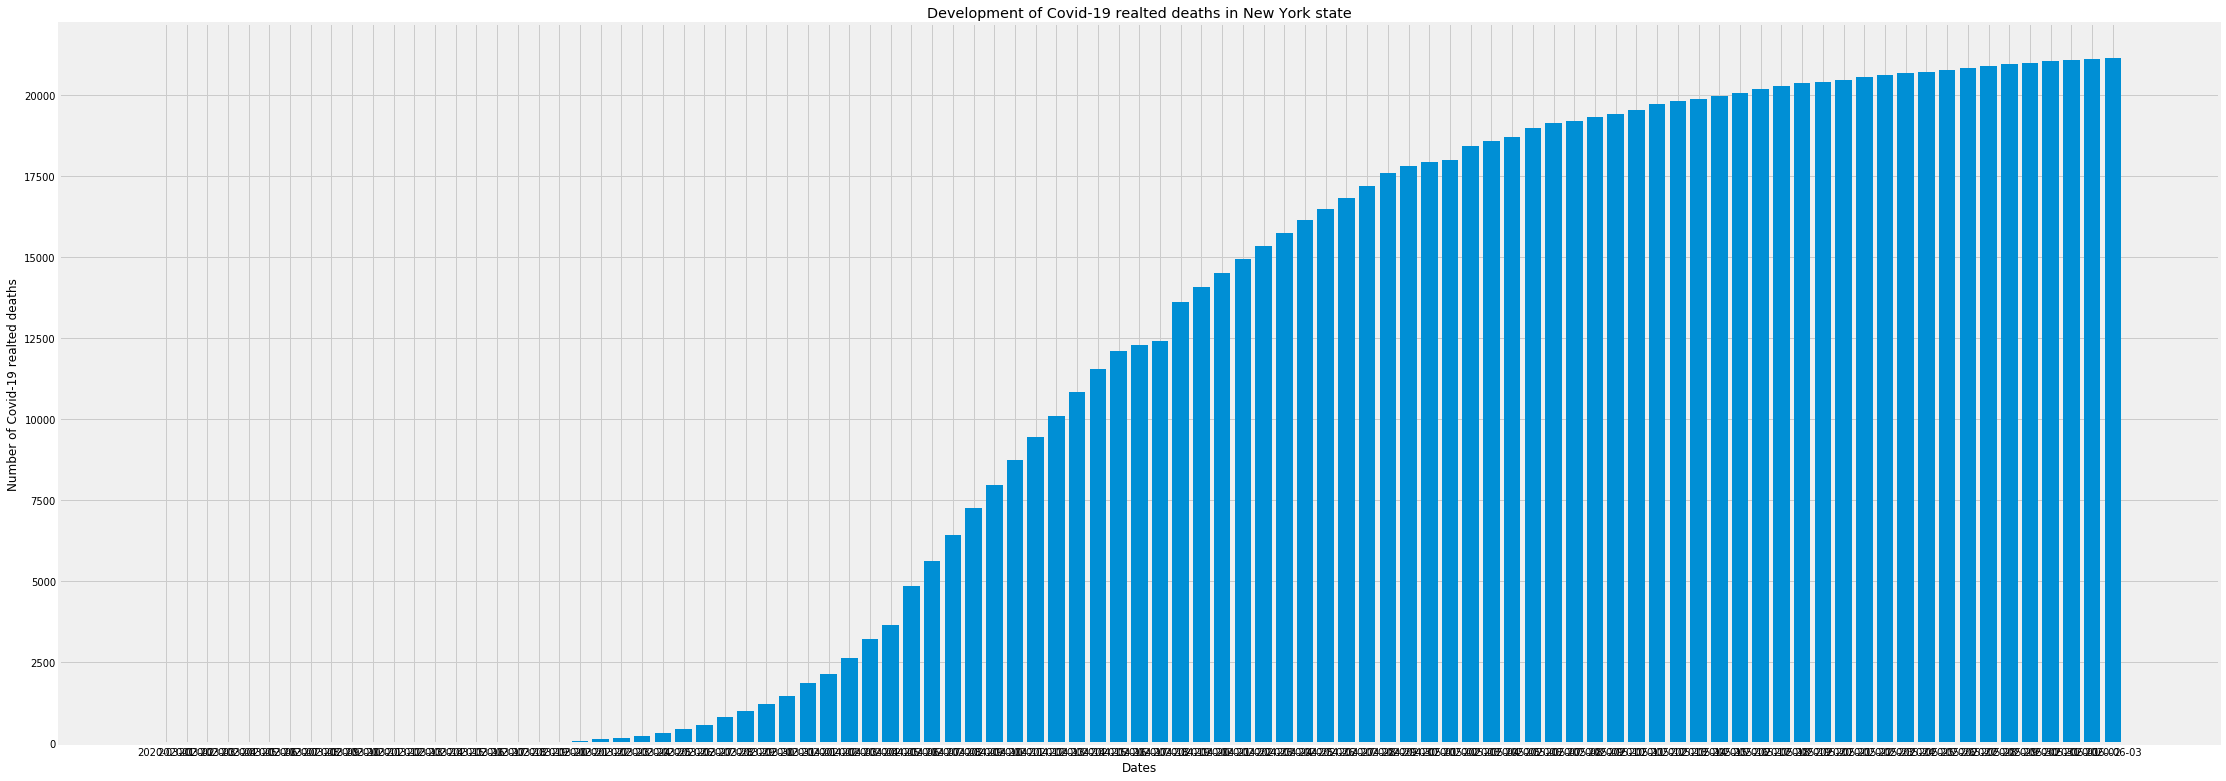

In [17]:
# Viz - Development for Covid-19 cases in New York state
fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0,0,1,1])
date = new_york_city['date']
cases = new_york_city['deaths']
ax.bar(date,cases)
ax.set_ylabel('Number of Covid-19 realted deaths')
ax.set_xlabel('Dates')
ax.set_title('Development of Covid-19 realted deaths in New York state')
plt.show()

#### Development for new Covid-19 related death in New York state

In [21]:
new_york_city.loc[:,'new deaths'] = new_york_city['deaths'].diff()
new_york_city

,date,county,state,fips,cases,deaths,new cases,new deaths
416,2020-03-01,New York City,New York,NaN,1,0,NaN,NaN
448,2020-03-02,New York City,New York,NaN,1,0,0.0,0.0
482,2020-03-03,New York City,New York,NaN,2,0,1.0,0.0
518,2020-03-04,New York City,New York,NaN,2,0,0.0,0.0
565,2020-03-05,New York City,New York,NaN,4,0,2.0,0.0
627,2020-03-06,New York City,New York,NaN,5,0,1.0,0.0
715,2020-03-07,New York City,New York,NaN,12,0,7.0,0.0
820,2020-03-08,New York City,New York,NaN,14,0,2.0,0.0
947,2020-03-09,New York City,New York,NaN,20,0,6.0,0.0
1098,2020-03-10,New York City,New York,NaN,37,0,17.0,0.0


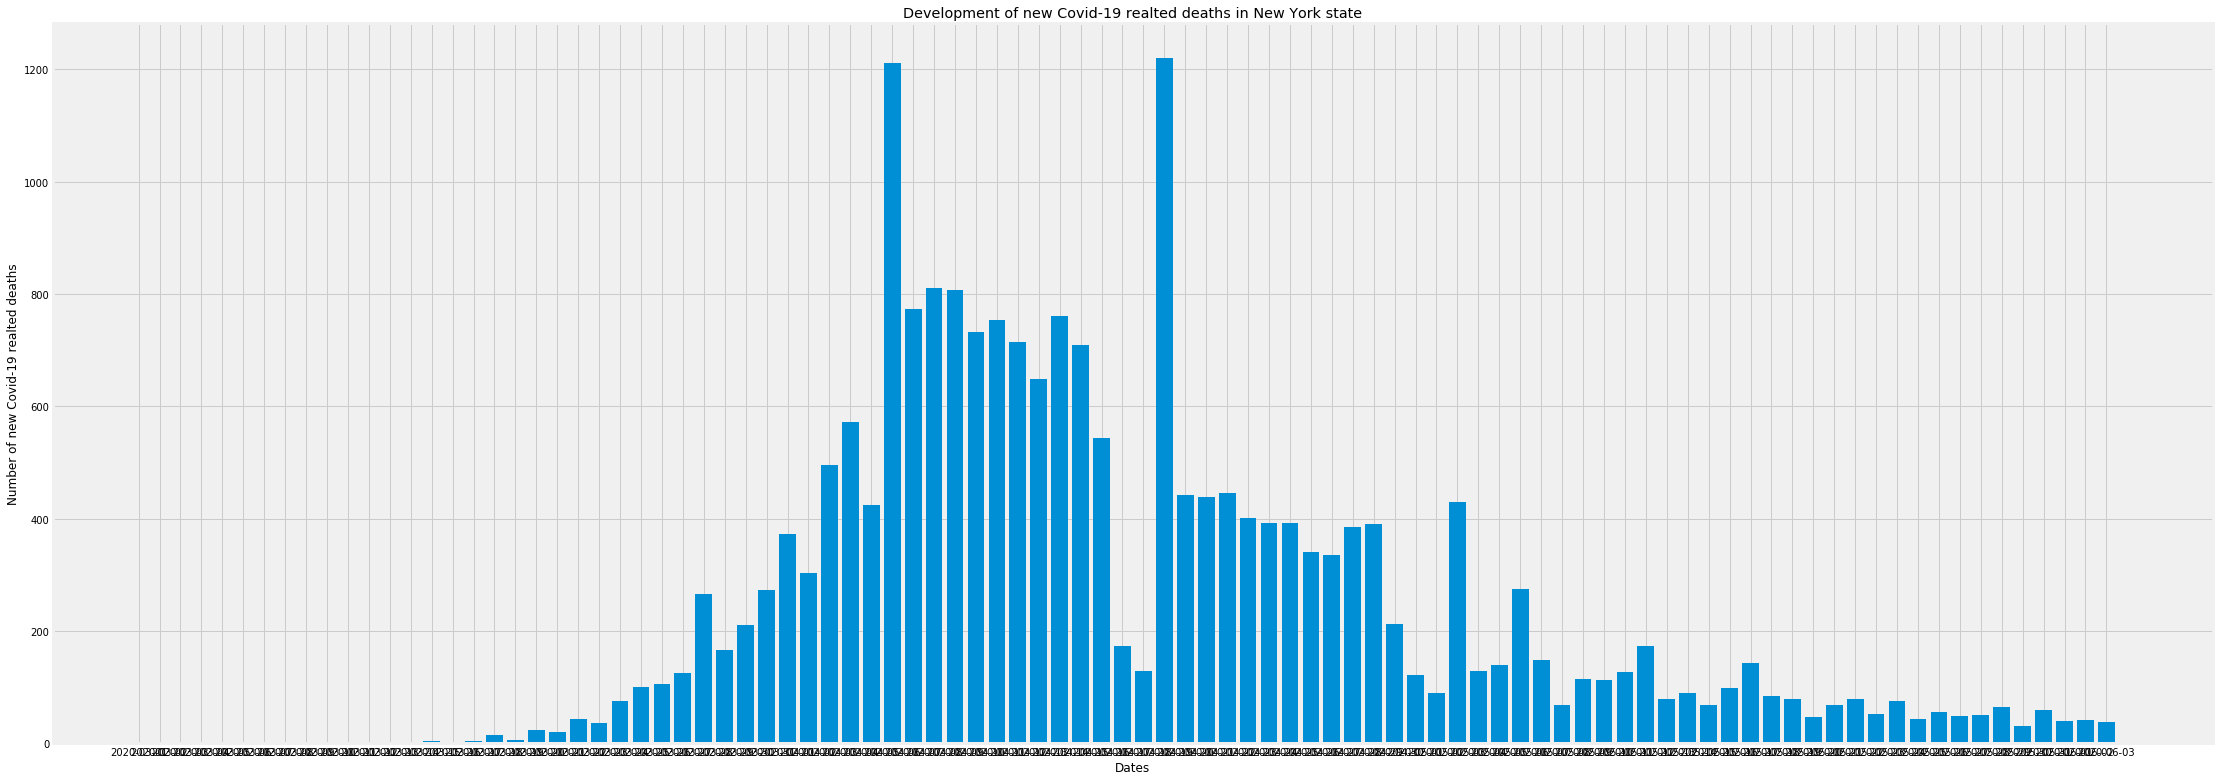

In [22]:
# Viz - Development for new Covid-19 related deaths in New York City
fig = plt.figure(figsize=(30,10))
ax = fig.add_axes([0,0,1,1])
date = new_york_city['date']
cases = new_york_city['new deaths']
ax.bar(date,cases)
ax.set_ylabel('Number of new Covid-19 realted deaths')
ax.set_xlabel('Dates')
ax.set_title('Development of new Covid-19 realted deaths in New York state')
plt.show()